<a href="https://colab.research.google.com/github/RexcyPutra/Hello-Project---Rexcy-Putra-A/blob/main/3_Visualization_Tools_2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [75]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the dataset and read it into a *pandas* dataframe.

In [76]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [77]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-77-5b807af711f8>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

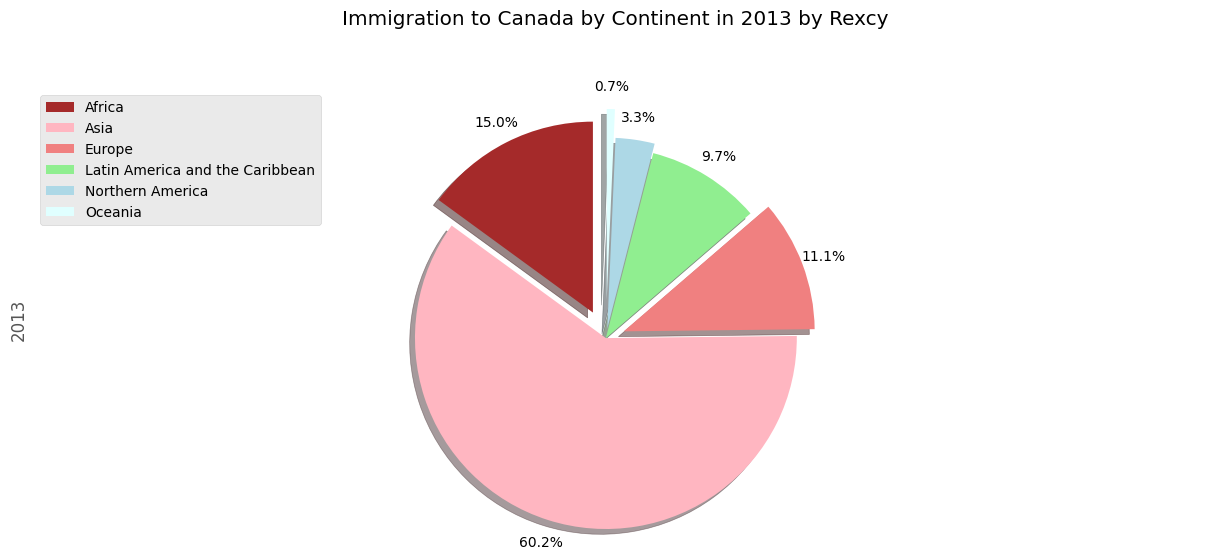

In [78]:
### type your answer here
# Define custom colors
colors_list = ['brown', 'lightpink', 'lightcoral', 'lightgreen', 'lightblue', 'lightcyan']
explode_list = [0.15, 0, 0.1, 0, 0.05, 0.2]


df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list,        # 'explode' lowest 3 continents
                            colors=colors_list,  # Add custom colors
                            )

plt.title('Immigration to Canada by Continent in 2013 by Rexcy', y=1.12)

plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [79]:
### type your answer here
# Get the dataset for Pakistan and Afghanistan
df_PA = df_can.loc[['Pakistan', 'Afghanistan'], years].transpose()
df_PA.head()
df_PA.describe()



Country,Pakistan,Afghanistan
count,34.000000,34.000000
mean,7105.882353,1724.676471
std,5315.849587,1196.705040
min,514.000000,16.000000
25%,1565.750000,762.750000
50%,7014.000000,1752.000000
75%,12259.000000,2615.000000
max,16708.000000,4067.000000


Step 2: Plot data.

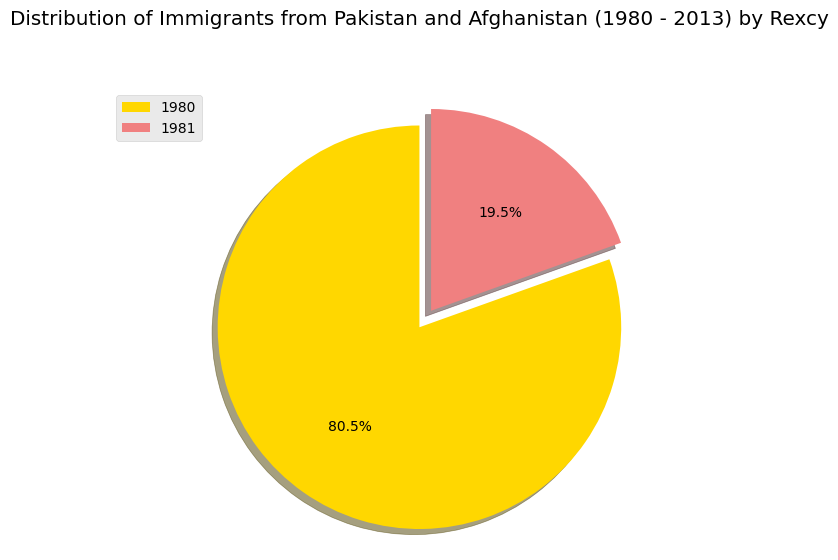

In [80]:
### type your answer here
# Create a pie chart for the distribution of immigrants from Pakistan and Afghanistan
explode_list = [0.1, 0]  # You can adjust the explode values as needed
colors_list = ['gold', 'lightcoral']
df_PA.sum().plot(
    kind='pie',
    figsize=(8, 6),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    labels=None,
    colors=colors_list,
    explode=explode_list,
)

# Set title and equal aspect ratio
plt.title('Distribution of Immigrants from Pakistan and Afghanistan (1980 - 2013) by Rexcy', y=1.12)
plt.axis('equal')

# Add legend
plt.legend(labels=df_PA.index, loc='upper left')

# Show the pie chart
plt.show()



**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [81]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

 # create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=0))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

df_total.head(3)

,year,total
0,1980,669
1,1981,678
2,1982,627


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

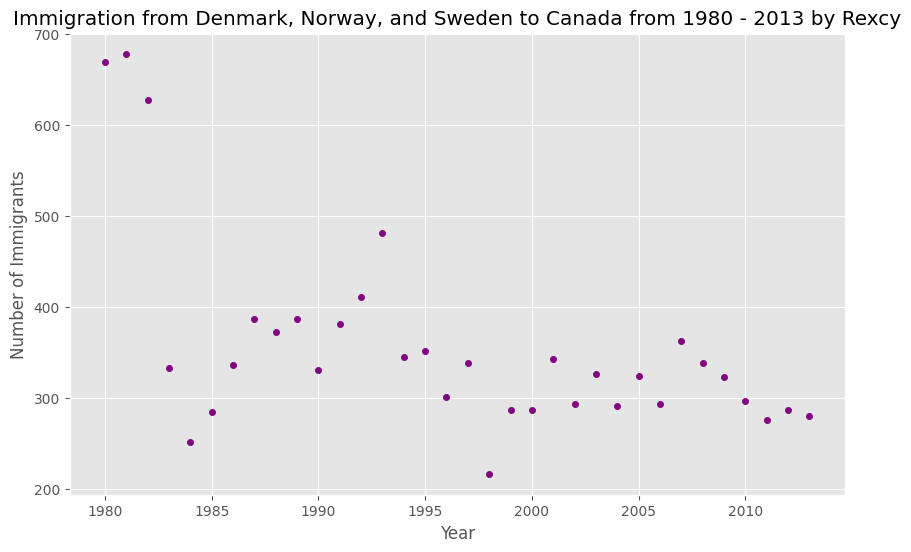

In [90]:
### type your answer here
# generate scatter plot
df_total.plot(kind='scatter', x = 'year', y='total', figsize=(10, 6), color='purple')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013 by Rexcy')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [85]:
### type your answer here

df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head(3)

# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


Step 2: Generate the bubble plots.

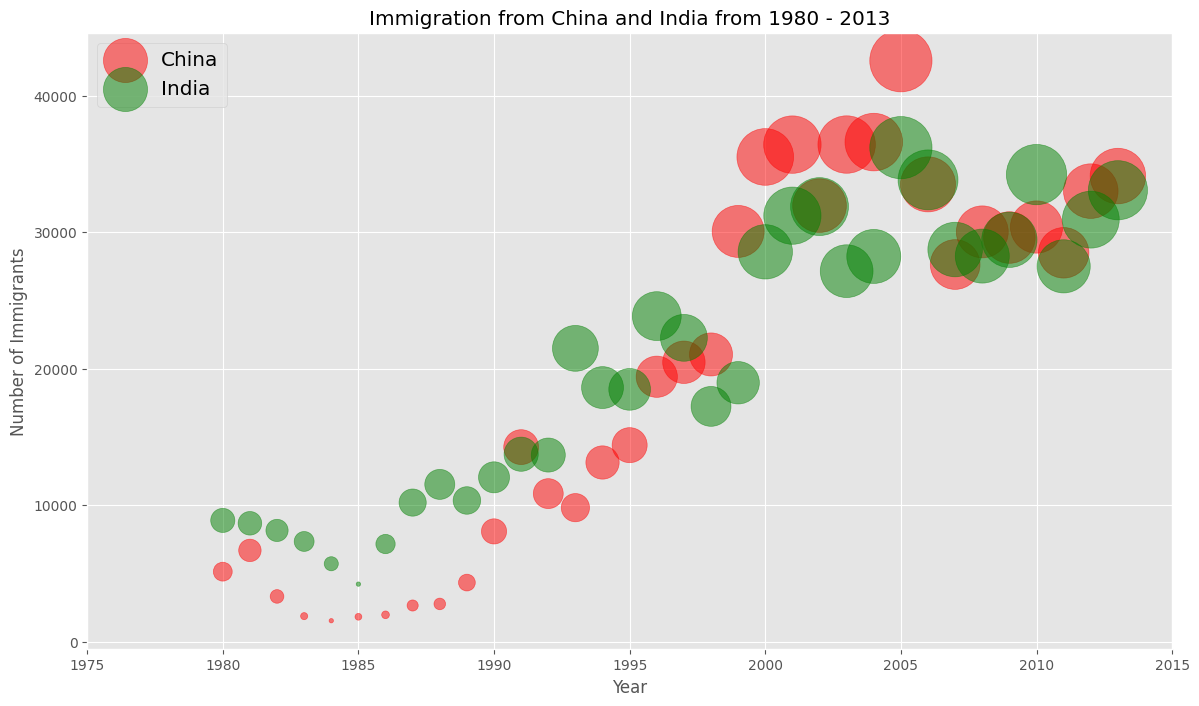

In [87]:
### type your answer here
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='red',
                    s=norm_china * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="green",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).